# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

### Задание:
<ol>
    <li>Посчитать tpr и fpr в ноутбуке к лекции. (true и false positive rate)</li>
    <li>Убедиться, что график ROC AUC получается таким же, как и штатными средствами.</li>
    <li>Построить график Precision - Recall на этих же данных.</li>
</ol>
В задании необходимо убедиться, что график roc auc построенный руками и встроенной функцией sklearn совпадают. То есть, необходимо руками повторить алгоритм roc auc

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data/affair_data.csv')
data.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
X = data[data.columns[:-1]]
X.head(2)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [4]:
Y = data['affair']


In [5]:
model = LogisticRegression()


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)


In [7]:
model.fit(X_train, Y_train)


LogisticRegression()

In [8]:
predictions = model.predict_proba(X_test)


In [9]:
model.score(X_test, Y_test)


0.7319371727748691

In [37]:
# manual calc

FPR = []  # false positive rate
TPR = []  # true positive rate
thresholds = np.arange(0.0, 1.01, 0.2)  # Iterate thresholds from 0.0 to 1.0

# get number of positive and negative examples in the dataset
P = sum(Y_test)
N = len(Y_test) - P

for thresh in thresholds:
    FP = 0
    TP = 0
    # Limiting floats to two decimal points, or threshold 0.6 will be 0.6000000000000001 which gives FP=0
    thresh = round(thresh, 2)
    for predicted_prob, actual in zip(predictions[:, 1], Y_test):
        if (predicted_prob >= thresh):
            if actual == 1:
                TP = TP + 1
            if actual == 0:
                FP = FP + 1
    FPR.append(FP/N)
    TPR.append(TP/P)


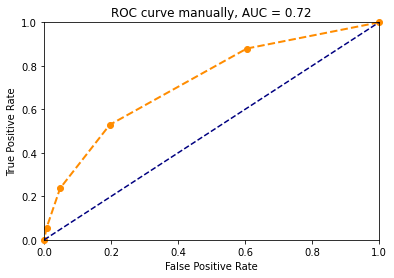

In [29]:
auc = -1 * np.trapz(TPR, FPR)

plt.plot(FPR, TPR, linestyle='--', marker='o', color='darkorange',
         lw=2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve manually, AUC = %.2f' % auc)
plt.show()


In [14]:
pr, re, thres = metrics.precision_recall_curve(Y_test, predictions[:, 1])


In [15]:
# площадь под кривой
metrics.average_precision_score(Y_test, predictions[:, 1])


0.5761329928884336

In [34]:
# значения false и true positive rate для различных значений порога
fpr, tpr, thres = metrics.roc_curve(Y_test, predictions[:, 1])


In [35]:
auc2 = metrics.auc(fpr, tpr)
auc2


0.7451629176618145

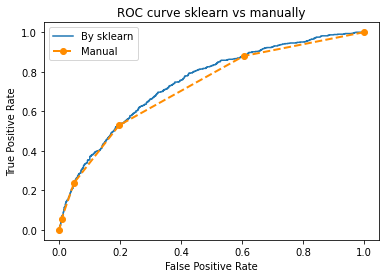

In [36]:
plt.plot(fpr, tpr, label='By sklearn') # sklearn
plt.plot(FPR, TPR, linestyle='--', marker='o', color='darkorange',
         lw=2, label='Manual', clip_on=False) # manual calculations
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0)
plt.title('ROC curve sklearn vs manually')
plt.show()
